In [175]:
import pandas as pd
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt

In [176]:
DATAPATH = 'data/'

In [177]:
data = pd.read_csv(DATAPATH+'openfoodfacts.csv',delimiter='\t',low_memory=True)

C:\Users\johan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,3,5,24,25,26,28,36,41,42,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [178]:
data_=data.dropna(subset=['labels_tags'])

In [179]:
#np.set_printoptions(threshold=np.nan)
import re
pat = re.compile("/vegan/")
vegan_set=data_[data_['labels_tags'].str.contains('vegan').fillna(False) & (~ data_['labels_tags'].str.contains('no-vegan').fillna(False)) ]

In [180]:
origin_lists=vegan_set.origins_tags.dropna().str.split(',')

In [181]:
origin_exploded=origin_lists.apply(pd.Series).unstack()

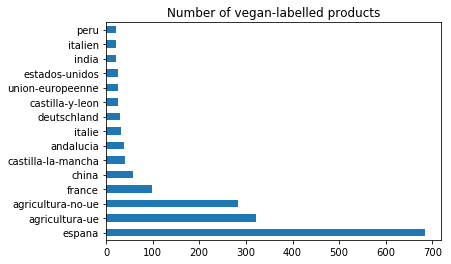

In [182]:
origin_exploded.value_counts().head(15).plot.barh()
plt.title('Number of vegan-labelled products')
plt.show()

In [183]:
total_origins=data.origins_tags.dropna().str.split(',')
total_origins_exploded=total_origins.apply(pd.Series).unstack()

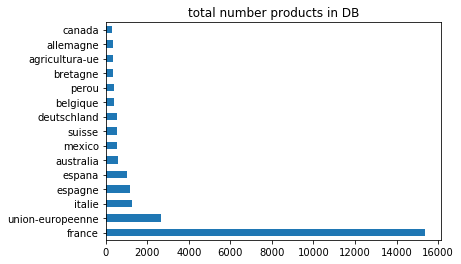

In [184]:
total_origins_exploded.value_counts().head()
total_origin_exploded.value_counts().head(15).plot.barh()
plt.title('total number products in DB')
plt.show()


In [185]:
vegan_origin_df=origin_exploded.to_frame().reset_index().drop(labels=['level_0'],axis=1)
total_origin_df=total_origin_exploded.to_frame().reset_index().drop(labels=['level_0'],axis=1)

In [186]:
total_origin_df.columns=['level_1','origin']
total_origin_df=total_origin_df.dropna()

In [187]:
total_count=total_origin_df.groupby(by=['origin']).size().sort_values(ascending=False).to_frame()

In [188]:
vegan_origin_df.columns=['level_1', 'vegan_loc']

In [189]:
vegan_count=vegan_origin_df.groupby(by=['vegan_loc']).size().to_frame()



In [190]:
comparison=pd.merge(total_count,vegan_count,right_index=True,left_index=True,how='inner')

In [191]:
relevent_index=['aceitunas', 'afrique', 'agadir', 'agypten', 'alava', 'albacete-provincia', 'albatera', 'alemania', 'alicante', 'alicante-provincia', 'allemagne', 'almendras', 'almeria-provincia', 'almunecar', 'alps', 'amandes-d-italie', 'amazonas', 'amazonie', 'america-del-sur', 'amerique', 'amerique-centrale', 'amerique-du-nord', 'amerique-du-sud', 'andalucia', 'andes', 'angleterre', 'angleterre-betterave', 'aragon', 'aranjuez', 'argelia', 'argentina', 'argentinien', 'arroz', 'asie', 'asie-pour-le-fruit-de-moines', 'asturias', 'atlantico-suroeste', 'australia', 'austria', 'autol', 'autriche', 'avoine-francaise', 'azucar', 'azur-quelle', 'bajo-aragon', 'bali', 'batata', 'belgica', 'belgien', 'belgium', 'bolivia', 'bolivie', 'bolivien', 'bosnien-herzegowina', 'brazil', 'bresil', 'bretagne', 'burkina-faso', 'cacahuetes', 'cacao', 'caceres-provincia', 'cadiz-provincia', 'caldes-de-malavella', 'calera-y-chozas', 'california', 'californie', 'camargue', 'cambrils', 'cana-de-azucar', 'canada', 'casas-de-haro', 'castilla-la-mancha', 'castilla-y-leon', 'cataluna', 'cevennes', 'chile', 'china', 'chine', 'chufa', 'ciego-montero', 'cienfuegos', 'ciruelas', 'ciudad-real-provincia', 'col', 'col-lombarda', 'colombia', 'columbia', 'commerce-equitable', 'comunidad-valenciana', 'conil-de-la-frontera', 'cordoba-provincia', 'corea', 'costa-de-galicia', 'costa-de-marfil', 'costa-rica', 'cuba', 'cuenca-provincia', 'desconocido', 'deutschland', 'dominikanische-republik', 'e-u-a', 'ecuador', 'egipto', 'egnil', 'egypte', 'el-bolson', 'el-mirador', 'equateur', 'esmeraldas', 'espagne', 'espana', 'estados-unidos', 'etats-unis','eutschland', 'extremadura', 'filderstadt', 'filipinas', 'fontanilles', 'fougerolles', 'france', 'francia', 'frankreich', 'fresas', 'fuera-de-espana', 'galicia', 'gard', 'garray', 'germany', 'gerona-provincia', 'gers', 'gers-en-france-pour-le-ble', 'ghana', 'girona', 'golfo-de-vizcaya', 'granada-provincia', 'grece', 'grecia', 'greece', 'griechenland', 'guadalajara-provincia', 'haiti', 'haute-provence', 'herefordshire', 'holanda', 'hongrie','huelva-provincia', 'inde', 'india', 'indien', 'indien-landwirtschaft', 'indonesia', 'indonesie', 'indonesien', 'industria-argentina', 'ingrediente-s', 'iran', 'ireland', 'islas-canarias', 'israel', 'italia', 'italie', 'italien', 'italy', 'jaen', 'japon', 'jativa', 'kanada', 'kenia', 'kirgistan', 'kolumbien', 'la-coruna-provincia', 'la-mancha-comarca', 'la-manchuela-comarca', 'la-montiela-pedania', 'la-orotava', 'la-rioja', 'leimuiden', 'leinfelden-echterdingen', 'lerida-provincia', 'lombardia', 'lomellina', 'madagascar', 'madrid-comunidad-autonoma', 'malaga-provincia', 'malaui', 'manantial-amer-palatin', 'manantial-bezoya-de-trescasas', 'manantial-font-sacalm', 'manantial-fuente-primavera', 'manantial-fuentevera', 'manantial-siguenza', 'manantial-vichy-catalan', 'marinaleda', 'marruecos', 'mazarron', 'melocotones', 'mexico', 'mexiko', 'mexique', 'midlands-de-l-ouest', 'milano', 'minglanilla', 'minho-lima', 'modena', 'montricoux', 'montseny', 'moratilla-de-henares', 'motril', 'munchsteinach', 'murcia', 'murcia-comunidad-autonoma', 'mures-des-pays-bas', 'myrtilles-du-maroc', 'nao-ue', 'nardo', 'navarra', 'niederosterreich', 'niger', 'nijar','nueva-zelanda', 'osterreich', 'pais-vasco', 'pakistan', 'palmira', 'papua-neuguinea', 'paraguay', 'pavia-provincia', 'pays-bas', 'pepinillos', 'perou', 'peru', 'philippinen', 'philippines', 'pichincha-provincia', 'piemont', 'pioz', 'plano-tx', 'poland', 'polonia', 'portugal', 'quintanar-del-rey', 'regiao-do-norte', 'region-centro-norte', 'reino-unido', 'remolacha-y-zanahoria', 'republica-dominicana', 'republique-dominicaine', 'requena', 'requena-utiel-comarca', 'rheinland', 'ribera-del-jalon-comarca', 'rice', 'rio-negro', 'riz', 'romania', 'roumanie', 'royaume-uni', 'rugen', 'rumanien', 'salamanca-provincia', 'san-antonio-requena', 'sant-hilari-sacalm', 'santa-cruz-de-tenerife-provincia', 'santaella', 'santo-domingo', 'santo-tome-y-principe', 'sao-tome', 'sao-tome-und-principe', 'schweden', 'segovia-provincia', 'selva-comarca', 'serbia', 'sevilla-provincia', 'sicile', 'sierra-de-gredos', 'siguenza', 'slowakei', 'soja', 'soja-bio', 'soja-de-france', 'soja-de-francia', 'soja-europeen', 'soja-origine-france', 'soja-sud-est', 'soria-provincia', 'south-africa', 'south-africa-local-and-imported', 'spain', 'spanien', 'sri-lanka', 'sud-est-de-la-france', 'sud-ouest', 'sud-ouest-de-la-france', 'sudafrica', 'sudafrika', 'sudamerica', 'sudamerika', 'suisse', 'switzerland', 'tailandia', 'tanzania', 'tanzanie', 'tarn-et-garonne', 'tarragona-provincia', 'thailand', 'thailande', 'toledo-provincia', 'tomates', 'tozeur', 'trentino-alto-adigio', 'trescasas', 'trinidad', 'trinidad-und-tobago', 'tunesien', 'tunez', 'tunisia', 'tunisie', 'turkei', 'turquia', 'turquie', 'uca', 'ucrania', 'ue', 'ue-non-ue', 'uganda', 'ukraine',  'united-kingdom', 'united-states', 'united-states-of-america', 'usa', 'usa-and-other-unspecified-countries', 'val-venosta', 'valencia', 'valencia-provincia', 'valladolid-provincia', 'vancouver-bc', 'various', 'venezie', 'venezuela', 'verin', 'viana-do-castelo', 'viana-do-castelo-distrito', 'vietnam', 'villa-del-prado', 'villalgordo-del-jucar', 'villamalea', 'villanueva-de-la-jara', 'waldviertel', 'west-indies', 'wiesbaum', 'yuca', 'zamora-provincia', 'zaragoza-provincia' ] 

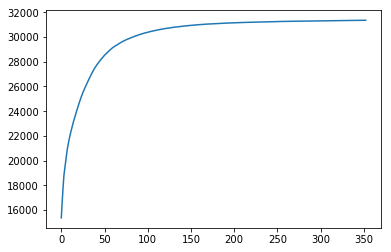

In [192]:
plt.plot(np.cumsum(comparison.loc[relevent_index].sort_values(['0_x'],ascending=False)['0_x'].values))
plt.show()


plt.show()

In [193]:
relevent_comparison=comparison.loc[relevent_index]
relevent_comparison=relevent_comparison[relevent_comparison['0_x']>100]


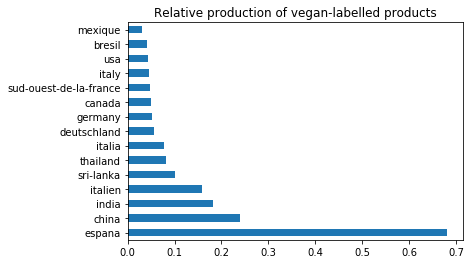

In [195]:
relevent_comparison['ratio']=relevent_comparison['0_y']/relevent_comparison['0_x']
relevent_comparison.ratio.sort_values(ascending=False).head(15).plot.barh()
plt.title('Relative production of vegan-labelled products')
plt.show()

In [ ]:
fat_set.merge(vegan_set,left_index=True, right_index=True,how='outer',indicator=True)._merge.head()

In [ ]:
vegan_set["created_datetime"] = pd.to_datetime(vegan_set["created_datetime"],errors="coerce")
dateparsed = vegan_set[vegan_set["created_datetime"].notnull()]

In [ ]:
vegan_date=dateparsed.reset_index().set_index('created_datetime')

In [ ]:
vegan_date["count"] = 1
vegan_date = vegan_date["count"].resample("30D").sum()
vegan_date.plot.line(title="Trend of articles containing palm oil over time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

In [ ]:
vegan_date.cumsum().plot.line()
plt.show()

In [14]:
fat_set=data.dropna(subset=['fat_100g'])

In [ ]:
data_